# TITANIC SURVIVAL PREDICTION PROJECT

## Step 1: Import libraries


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

#
## Step 2: Import Dataset

In [55]:
# Load the dataset
df = pd.read_csv("Tasks' Dataset/Titanic-Dataset.csv")

In [56]:
# Display basic information and statistics
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


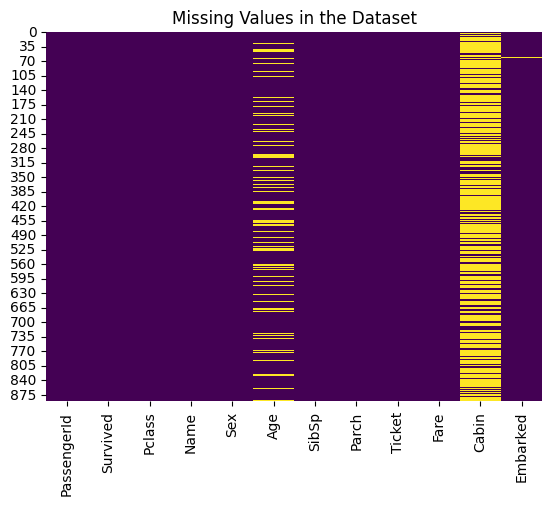

In [59]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

#
## Step 3: Data Preprocessing

In [60]:
# Fill missing values in 'Age' with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

In [61]:
# Fill missing values in 'Embarked' with the mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [62]:
# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [63]:
# Encode categorical variables
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

In [64]:
# Drop non-essential columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [65]:
# Feature Scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [66]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2
5,0,3,1,-0.104637,0,0,-0.478116,1
6,0,1,1,1.893459,0,0,0.395814,2
7,0,3,1,-2.102733,3,1,-0.224083,2
8,1,3,0,-0.181487,0,2,-0.424256,2
9,1,2,0,-1.180535,1,0,-0.042956,0


#
## Step 4: Data Visualization

### _Passenger Class

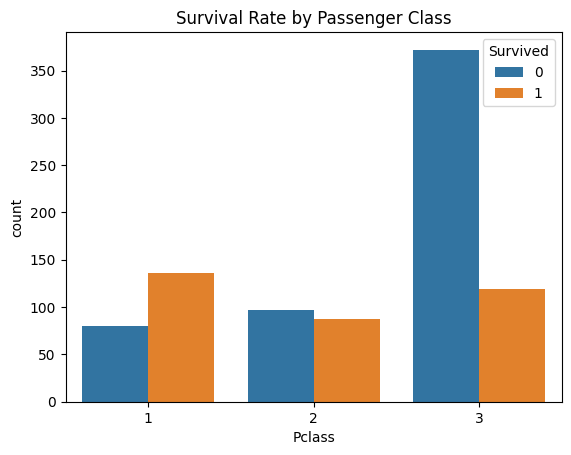

In [67]:
# Survival rate by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

###
### _Gender

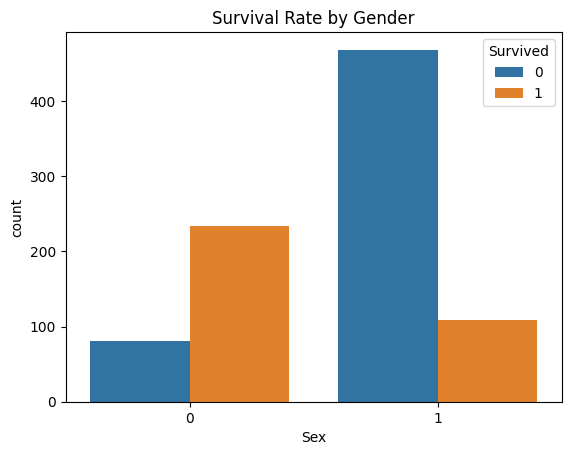

In [68]:
# Survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

###
### _Location

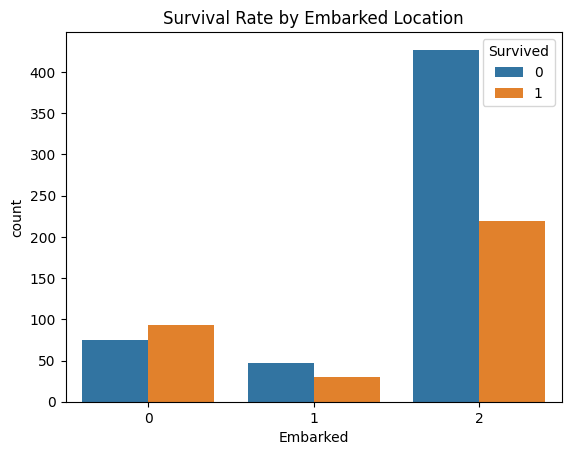

In [69]:
# Survival rate by embarked location
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Rate by Embarked Location')
plt.show()

#
## Step 5: Model Training

In [70]:
# Define features and target variable
X = df.drop(columns='Survived')
Y = df['Survived']

In [71]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [72]:
# Initialize and train the logistic regression model
log = LogisticRegression(random_state=0)
log.fit(x_train, y_train)

LogisticRegression(random_state=0)

#
## Step 6: Model Evaluation

In [73]:
y_pred = log.predict(x_test)

In [74]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [75]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7988826815642458
Confusion Matrix:
[[92 18]
 [18 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



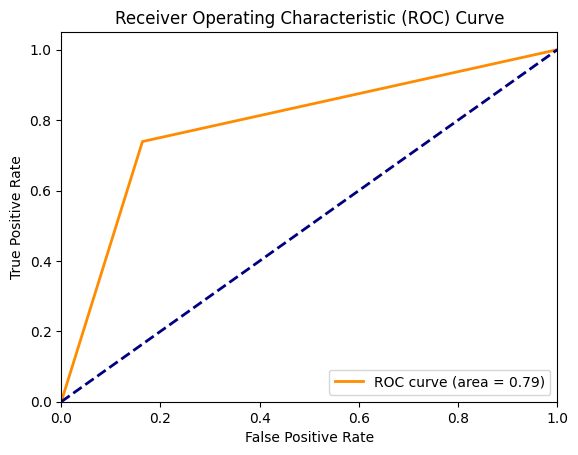

In [76]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#
## Step 7: Conclusion 

In [77]:
# Define an example passenger with all features: Pclass, Sex, Age, SibSp, Parch, Embarked, Fare
example_passenger = np.array([[1, 0, 30, 0, 0, 2, 50.0]])  # Example input: Pclass=1, Sex=female, Age=30, SibSp=0, Parch=0, Embarked=2, Fare=50.0

# Scale the continuous features (Age and Fare)
example_passenger[:, [2, 6]] = scaler.transform(example_passenger[:, [2, 6]])

# Make a prediction
res = log.predict(example_passenger)

if res == 0:
    print("Sorry! Not Survived")
else:
    print("Survived!")

# Summarize findings
print("The logistic regression model achieves an accuracy of {:.2f}% on the test set.".format(accuracy * 100))
print("The ROC curve area is {:.2f}.".format(roc_auc))
print("Key insights: Women and higher-class passengers had a higher survival rate.")

Survived!
The logistic regression model achieves an accuracy of 79.89% on the test set.
The ROC curve area is 0.79.
Key insights: Women and higher-class passengers had a higher survival rate.
